In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
# read data
datadf = pd.read_csv('INF2178_A3_data.csv')
datadf

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


In [63]:
# disply data info
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [64]:
# disply data summary
datadf.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [65]:
# group different income group and check child's grades from fall to spring
grouped_data = datadf.groupby('incomegroup').mean()
grouped_data

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands
incomegroup,,,,,,,,
1,32.786798,23.924504,19.947683,43.665077,33.883051,25.069492,22019.718482,22.019718
2,36.292517,27.568468,23.887885,48.009450,38.464691,29.143605,51742.759528,51.742760
3,39.898493,31.012720,26.451851,52.206880,42.411898,31.567718,100989.757352,100.989757


C:\Users\zxx91\AppData\Local\Temp\ipykernel_17292\3728896401.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_scores_by_bracket = datadf.groupby('Income Bracket').mean()[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore', 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']]
C:\Users\zxx91\AppData\Local\Temp\ipykernel_17292\3728896401.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(average_scores_by_bracket['Income Bracket'], rotation=45, ha="right",fontsize=15)
C:\Users\zxx91\AppData\Local\Temp\ipykernel_17292\3728896401.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

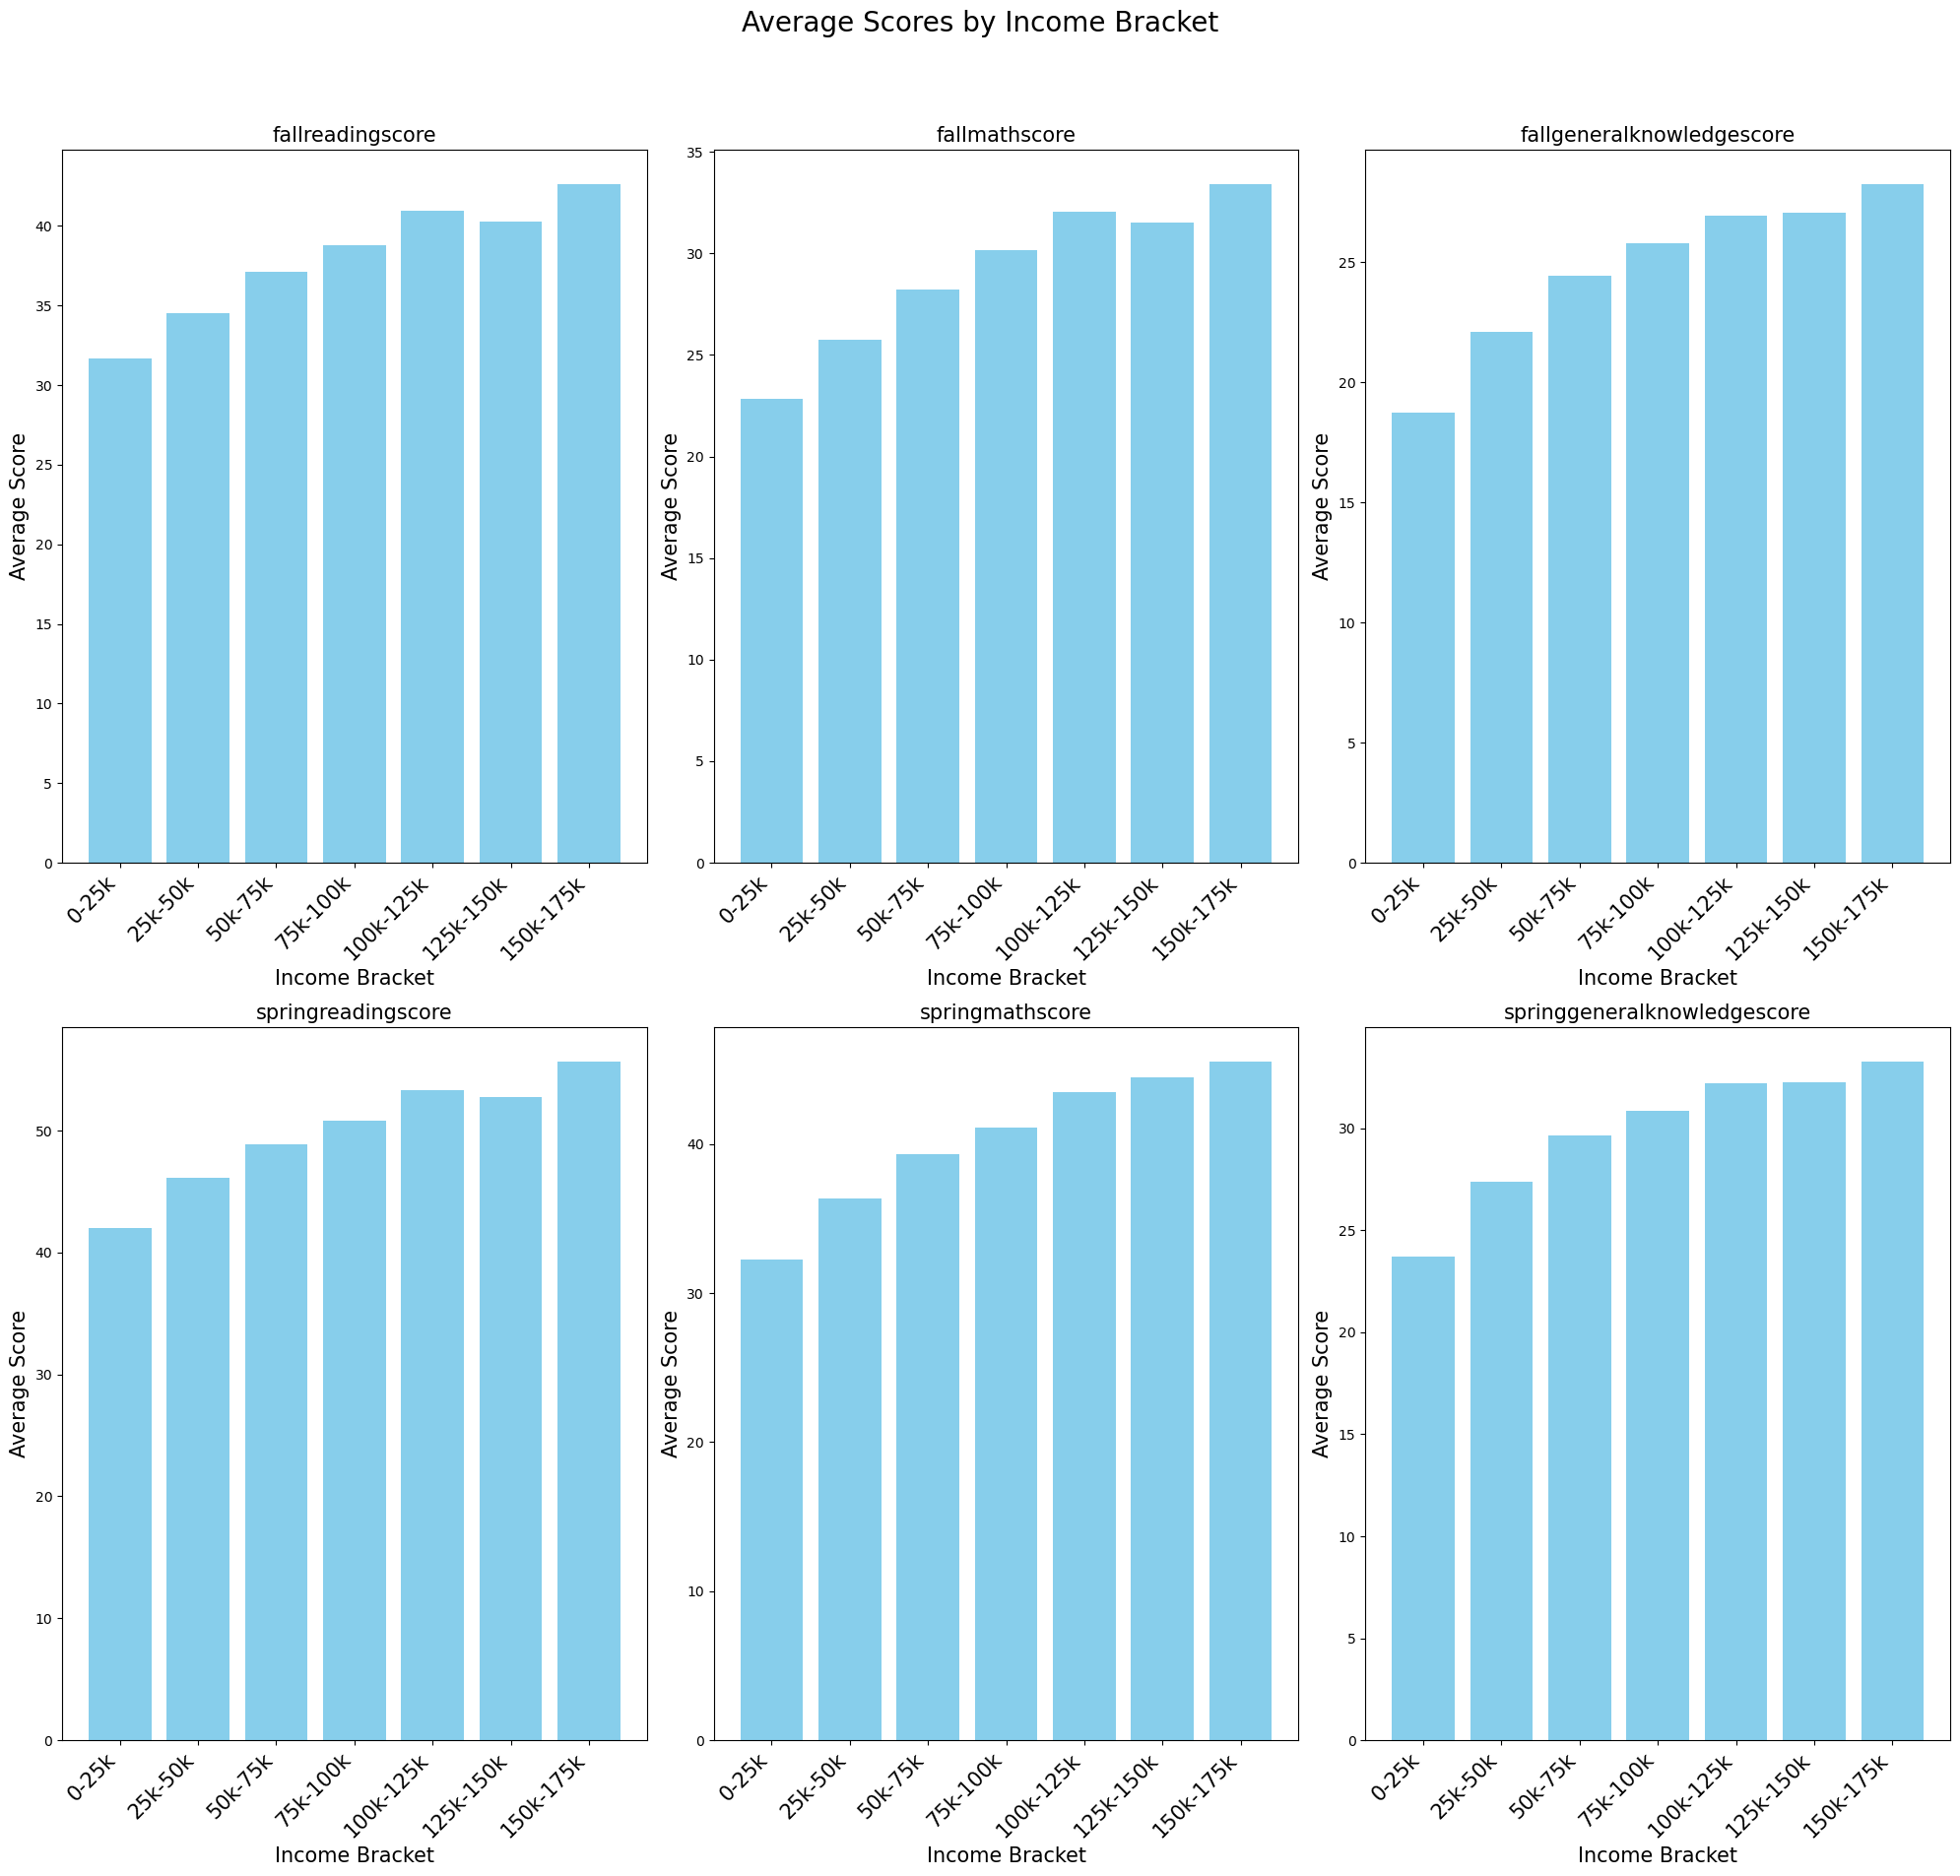

In [66]:
# draw plot for Group data into meaningful income brackets 0-25k, 25k-50k, 50k-75k
# Calculate the mean scores for each bracket
bins = [0, 25, 50, 75, 100, 125, 150, 175]
labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k']
datadf['Income Bracket'] = pd.cut(datadf['incomeinthousands'], bins=bins, labels=labels, right=False)
datadf['Income Bracket'] = pd.cut(datadf['incomeinthousands'], bins=bins, labels=labels, right=False)
average_scores_by_bracket = datadf.groupby('Income Bracket').mean()[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore', 'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']]
average_scores_by_bracket.reset_index(inplace=True)
average_scores_by_bracket.dropna() 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
fig.suptitle('Average Scores by Income Bracket', fontsize=20)
axes = axes.flatten()
for ax, score_type in zip(axes, average_scores_by_bracket.columns[1:]):  # Skip 'Income Bracket' column for score types
    ax.bar(average_scores_by_bracket['Income Bracket'], average_scores_by_bracket[score_type], color='skyblue')
    ax.set_title(score_type, fontsize=15)
    ax.set_xticklabels(average_scores_by_bracket['Income Bracket'], rotation=45, ha="right",fontsize=15)
    ax.set_ylabel('Average Score', fontsize=15)
    ax.set_xlabel('Income Bracket', fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [67]:
# group all average score for fall and spring, based on the fall and spring calculate the improvement from fall to winter
datadf['avg_fall_score'] = datadf[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore']].mean(axis=1)
datadf['avg_spring_score'] = datadf[['springreadingscore', 'springmathscore', 'springgeneralknowledgescore']].mean(axis=1)
datadf['academic_improvement'] = datadf['avg_spring_score'] - datadf['avg_fall_score']

analysis_datadf = datadf[['incomeinthousands', 'avg_fall_score', 'academic_improvement']]

print(analysis_datadf.head())

   incomeinthousands  avg_fall_score  academic_improvement
0              140.0       36.647333             10.020333
1              120.0       44.469000             15.477333
2               90.0       32.452667              1.724667
3               50.0       23.848000              8.409333
4               55.0       23.452333              4.353333


,income_group,avg_fall_score,academic_improvement
0,125k-150k,36.647333,10.020333
1,100k-125k,44.469000,15.477333
2,75k-100k,32.452667,1.724667
3,25k-50k,23.848000,8.409333
4,50k-75k,23.452333,4.353333
...,...,...,...
11928,25k-50k,23.294667,6.735000
11929,25k-50k,26.383667,13.798667
11930,25k-50k,29.258667,7.652333
11931,25k-50k,31.111333,14.842333


C:\Users\zxx91\AppData\Local\Temp\ipykernel_17292\2524264160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = analysis_datadf.groupby('income_group').mean()


,avg_fall_score,academic_improvement
income_group,,
0-25k,24.562636,8.326800
25k-50k,27.956204,9.175416
50k-75k,30.153048,9.336090
75k-100k,32.008576,9.515880
100k-125k,33.535830,9.666218
125k-150k,34.468237,10.171485
150k-175k,NaN,NaN


In [70]:
# test Homogeneity of variances
groups = [group['academic_improvement'].dropna().tolist() for name, group in analysis_datadf.groupby('incomeinthousands', observed=True)]
groups = [group for group in groups if len(group) > 1]
if len(groups) > 1:
    stat, p_value = levene(*groups)
    print(f"Levene's test statistic: {stat}, p-value: {p_value}")
    if p_value > 0.05:
        print("The assumption of homogeneity of variances is not violated. (Fail to reject the null hypothesis)")
    else:
        print("The assumption of homogeneity of variances is violated. (Reject the null hypothesis)")
else:
    print("Insufficient data for Levene's test. Ensure multiple groups have sufficient non-NaN data.")

Levene's test statistic: 1.0523787120020935, p-value: 0.294886085199163
The assumption of homogeneity of variances is not violated. (Fail to reject the null hypothesis)


In [69]:
# Define the model
model = ols('academic_improvement ~ incomeinthousands + avg_fall_score', data=analysis_datadf).fit()
# Perform ANCOVA
ancova_results = sm.stats.anova_lm(model, typ=2)
ancova_results

,sum_sq,df,F,PR(>F)
incomeinthousands,131.543695,1.0,6.940442,8.437712e-03
avg_fall_score,8298.837035,1.0,437.859060,1.627401e-95
Residual,226111.858389,11930.0,NaN,NaN


In [68]:
analysis_datadf['incomeinthousands']

0        140.0
1        120.0
2         90.0
3         50.0
4         55.0
         ...  
11928     39.0
11929     26.0
11930     45.0
11931     28.0
11932     13.0
Name: incomeinthousands, Length: 11933, dtype: float64

In [ ]:
datadf['income_group'] = pd.cut(datadf['incomeinthousands'], bins=[0, 25, 50, 75, 100, 125, 150, 175], labels=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k'])
analysis_datadf = datadf[['income_group', 'avg_fall_score', 'academic_improvement']]
analysis_datadf

In [ ]:
group_means = analysis_datadf.groupby('income_group').mean()
group_means